In [51]:
import boto3
import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import seaborn as sns
import dotenv
import os
from spacytextblob.spacytextblob import SpacyTextBlob
import pandas as pd
dotenv.load_dotenv()

True

In [2]:
!pip install seaborn

In [3]:
import spacy

In [4]:
nlp=spacy.load('en_core_web_sm')

In [5]:
nlp.add_pipe('spacytextblob')

In [6]:
text = 'I had a really horrible day. It was the worst day ever! But every now and then I have a really good day that makes me happy.'

In [7]:
doc = nlp(text)

In [8]:
doc._.blob.polarity

-0.125

In [9]:
def define_sentiment(polarity):
    if polarity < -0.3:
        return 'negative'
    elif polarity > 0.3:
        return 'positive'
    return 'neutral'

In [10]:
define_sentiment(-0.3)

'neutral'

In [11]:
# read from posts

In [30]:
s3 = boto3.client('s3', aws_access_key_id=os.environ['AWS_ACCESS_KEY'],
                  aws_secret_access_key=os.environ['AWS_SECRET_KEY'])
obj = s3.get_object(Bucket='dune-ml', Key='PUBLICATIONS_v2.json')
result = obj['Body'].read().decode('utf-8')
lens_data = json.loads(result)

In [31]:
df = pd.DataFrame(lens_data)

In [32]:
df['content'] = df['metadata'].apply(lambda x: x['content'])

In [33]:
contents = df['content'].values
df_small = df[:10]

In [35]:
df.dropna(subset=['content'],inplace=True)

In [36]:
df['doc'] = df['content'].apply(nlp)

In [37]:
df['sentiment'] = df['doc'].apply(lambda x: define_sentiment(x._.blob.polarity))

In [38]:
df['is_positive'] = df['sentiment'] == 'positive'
df['is_negative'] = df['sentiment'] == 'negative'
df['is_neutral'] = df['sentiment'] == 'neutral'
df['no_category'] = 1

In [39]:
df.head()

,__typename,id,profile,stats,metadata,createdAt,collectModule,referenceModule,appId,hidden,...,mirrorOf,mirrors,mainPost,content,doc,sentiment,is_positive,is_negative,is_neutral,no_category
0,Mirror,0x686d-0x0c,"{'id': '0x686d', 'name': None, 'bio': None, 'a...","{'totalAmountOfMirrors': 0, 'totalAmountOfColl...","{'name': 'Post by @wagame.lens', 'description'...",2022-09-17T19:00:16.000Z,"{'__typename': 'FreeCollectModuleSettings', 't...",None,lenster,False,...,"{'id': '0x81e8-0x32', 'profile': {'id': '0x81e...",NaN,NaN,"Hey anon, there’s more 🚨 alpha 🚨 that we manag...","(Hey, anon, ,, there, ’s, more, 🚨, alpha, 🚨, t...",neutral,False,False,True,1
1,Mirror,0x09b7-0x22,"{'id': '0x09b7', 'name': 'MAR', 'bio': None, '...","{'totalAmountOfMirrors': 0, 'totalAmountOfColl...","{'name': 'Post by @grocery.lens', 'description...",2022-09-17T18:59:30.000Z,"{'__typename': 'FreeCollectModuleSettings', 't...",None,lenster,False,...,"{'id': '0xf9f4-0x01', 'profile': {'id': '0xf9f...",NaN,NaN,Guten mergen. \n\nHere’s a little something fr...,"(Guten, mergen, ., \n\n, Here, ’s, a, little, ...",neutral,False,False,True,1
2,Mirror,0xbdac-0x02,"{'id': '0xbdac', 'name': 'saeid7', 'bio': 'may...","{'totalAmountOfMirrors': 0, 'totalAmountOfColl...","{'name': 'Post by @grocery.lens', 'description...",2022-09-17T18:58:42.000Z,"{'__typename': 'FreeCollectModuleSettings', 't...",None,lenster,False,...,"{'id': '0xf9f4-0x01', 'profile': {'id': '0xf9f...",NaN,NaN,Guten mergen. \n\nHere’s a little something fr...,"(Guten, mergen, ., \n\n, Here, ’s, a, little, ...",neutral,False,False,True,1
3,Post,0xd547-0x0603,"{'id': '0xd547', 'name': None, 'bio': None, 'a...","{'totalAmountOfMirrors': 0, 'totalAmountOfColl...","{'name': 'Fields', 'description': None, 'conte...",2022-09-17T18:57:44.000Z,"{'__typename': 'FreeCollectModuleSettings', 't...",None,phaver,False,...,NaN,[],NaN,Fields,(Fields),neutral,False,False,True,1
4,Mirror,0x1d6e-0x0140,"{'id': '0x1d6e', 'name': 'Eremita', 'bio': 'en...","{'totalAmountOfMirrors': 0, 'totalAmountOfColl...",{'name': 'The result of resin flower🌺 #art #n...,2022-09-17T18:57:26.000Z,"{'__typename': 'FreeCollectModuleSettings', 't...",None,phaver,False,...,"{'id': '0xd512-0x41', 'profile': {'id': '0xd51...",NaN,NaN,The result of resin flower🌺\n\n#art #nft #nfta...,"(The, result, of, resin, flower, 🌺, \n\n, #, a...",neutral,False,False,True,1


In [40]:
df.createdAt = pd.to_datetime(df.createdAt)

In [41]:
#grouped_data = df.groupby([pd.Grouper(key='createdAt', axis=0, freq='h'),'sentiment'],as_index=True).count()
#sns.lineplot(data=grouped_data, linewidth=2.5,x='')

In [42]:
grouped_data = df.groupby([pd.Grouper(key='createdAt', axis=0, freq='h', )])[['is_negative','is_positive','is_neutral',
                                                              'no_category']].sum()

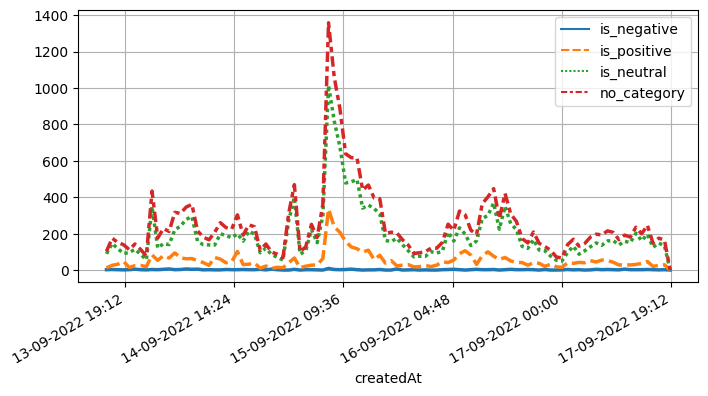

In [43]:
fig, ax = plt.subplots(figsize=(8,4))
sns.lineplot(data=grouped_data, linewidth=2.5,ax=ax)
ax.xaxis.set_major_locator(plt.MaxNLocator(7))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y %H:%M'))
ax.grid(True)
fig.autofmt_xdate()
plt.show()

In [64]:
# write to s3
#df['createdAt'] = df['createdAt'].dt.strftime('%Y-%m-%d %H:%M:%S')
df.drop(columns=['doc'], inplace=True)

In [71]:
df_to_export = df[['createdAt','is_negative','is_positive','is_neutral','no_category']]

In [65]:
class NumpyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        return json.JSONEncoder.default(self, obj)

#a = np.array([[1, 2, 3], [4, 5, 6]])
#print(a.shape)
#json_dump = json.dumps({'a': a, 'aa': [2, (2, 3, 4), a], 'bb': [2]}, 
#                       cls=NumpyEncoder)
#print(json_dump)

In [72]:
#df.to_records(index=False)
json_dump = json.dumps(df_to_export.to_records(index=False), cls=NumpyEncoder)
s3.put_object(
            Body=json_dump,
            Bucket='dune-ml',
            Key='{}.json'.format('sentiment_publications_v2'))

{'ResponseMetadata': {'RequestId': 'BPHH3M84HD6JJ160',
  'HostId': 'Q7ZSEshbafGoHGaVtuds6gZ28a4gxo62VkxPZOZbacs1A71VqniRAEeRYWKznkvED+jeY/mwJHk=',
  'HTTPStatusCode': 200,
  'HTTPHeaders': {'x-amz-id-2': 'Q7ZSEshbafGoHGaVtuds6gZ28a4gxo62VkxPZOZbacs1A71VqniRAEeRYWKznkvED+jeY/mwJHk=',
   'x-amz-request-id': 'BPHH3M84HD6JJ160',
   'date': 'Sun, 18 Sep 2022 07:27:08 GMT',
   'etag': '"5be65d029f08f6fc2e6ece8c5ea70879"',
   'server': 'AmazonS3',
   'content-length': '0'},
  'RetryAttempts': 0},
 'ETag': '"5be65d029f08f6fc2e6ece8c5ea70879"'}

In [73]:
df_to_export.head()

,createdAt,is_negative,is_positive,is_neutral,no_category
0,2022-09-17 19:00:16,False,False,True,1
1,2022-09-17 18:59:30,False,False,True,1
2,2022-09-17 18:58:42,False,False,True,1
3,2022-09-17 18:57:44,False,False,True,1
4,2022-09-17 18:57:26,False,False,True,1
